In [5]:
# load data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# presentable
sns.set(style="whitegrid")
# load data set
df=pd.read_csv("/content/drive/MyDrive/engineering_dataset_2000.csv")
# display first row
df.head()

,StudentID,Year,State,CollegeType,Branch,Gender,Category,GPA_10,EntranceScore_200,Placed,Salary_kINR_per_annum,HigherStudies,StartupFounder,AbroadJob,InternshipMonths
0,S1861,2015,Telangana,Government,ME,Male,General,8.07,113,No,0.0,No,No,No,2
1,S0354,2017,Tamil Nadu,Private,IT,Male,General,6.11,111,No,0.0,No,No,No,5
2,S1334,2025,Punjab,Private,IT,Female,General,5.45,136,Yes,1006.0,Yes,No,No,2
3,S0906,2019,Tamil Nadu,Government,ME,Female,General,6.86,161,No,0.0,No,No,Yes,1
4,S1290,2018,Uttar Pradesh,Private,ME,Male,OBC,6.52,128,No,0.0,No,No,No,2


In [7]:
# 1. Remove Duplicate Rows here all duplicates will be removed
df.drop_duplicates(inplace=True)

# 3. Fill Remaining Missing Values
df.fillna(method='ffill', inplace=True)   # forward-fill
df.fillna(method='bfill', inplace=True)   # backward-fill

# 4. Reset Index after cleaning
df.reset_index(drop=True, inplace=True)

# 5. Check result
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StudentID              2000 non-null   object 
 1   Year                   2000 non-null   int64  
 2   State                  2000 non-null   object 
 3   CollegeType            2000 non-null   object 
 4   Branch                 2000 non-null   object 
 5   Gender                 2000 non-null   object 
 6   Category               2000 non-null   object 
 7   GPA_10                 2000 non-null   float64
 8   EntranceScore_200      2000 non-null   int64  
 9   Placed                 2000 non-null   object 
 10  Salary_kINR_per_annum  2000 non-null   float64
 11  HigherStudies          2000 non-null   object 
 12  StartupFounder         2000 non-null   object 
 13  AbroadJob              2000 non-null   object 
 14  InternshipMonths       2000 non-null   int64  
dtypes: f

/tmp/ipython-input-4287711139.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)   # forward-fill
/tmp/ipython-input-4287711139.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)   # backward-fill


,0
StudentID,0
Year,0
State,0
CollegeType,0
Branch,0
Gender,0
Category,0
GPA_10,0
EntranceScore_200,0
Placed,0


In [8]:
# Convert Placed column to numeric (Yes/No → 1/0)
df['Placed'] = df['Placed'].replace({'Yes': 1, 'No': 0}).astype(float)

# Convert Salary column to numeric (remove commas/₹ if present)
df['Salary_kINR_per_annum'] = df['Salary_kINR_per_annum'].replace('[\₹,]', '', regex=True).astype(float)

/tmp/ipython-input-2904309886.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Placed'] = df['Placed'].replace({'Yes': 1, 'No': 0}).astype(float)


In [9]:
# Branch-wise simple summary
pivot = df.groupby('Branch').agg({
    'StudentID': 'count',
    'Salary_kINR_per_annum': 'mean',
    'Placed': 'mean'
})
print(pivot)

               StudentID  Salary_kINR_per_annum    Placed
Branch                                                   
Biotechnology        130             312.823077  0.538462
CE                   216             275.574074  0.481481
CSE                  403            1030.076923  0.878412
Chemical             124             262.991935  0.483871
ECE                  358             544.047486  0.659218
EE                   196             428.505102  0.632653
IT                   262             763.057252  0.854962
ME                   311             346.356913  0.565916


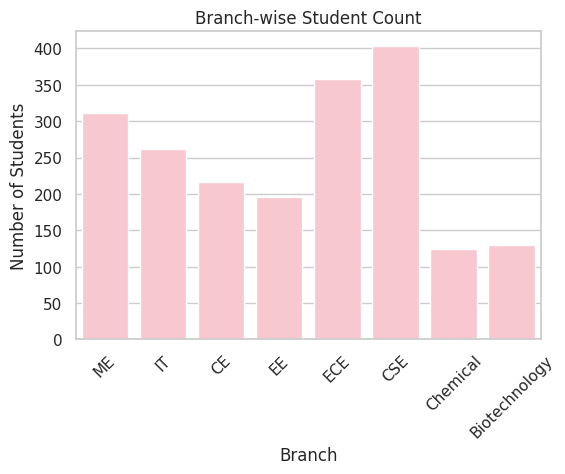

In [10]:
# branch wise

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Branch',color='pink')
plt.title("Branch-wise Student Count")
plt.xlabel("Branch")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

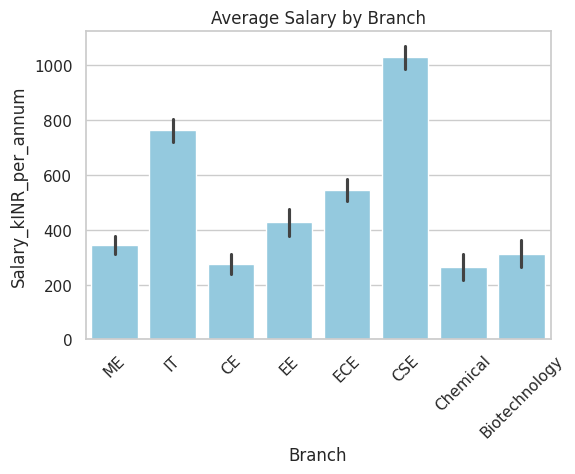

In [11]:
# lets look at average salary
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Branch', y='Salary_kINR_per_annum',color='skyblue')
plt.title("Average Salary by Branch")
plt.xticks(rotation=45)
plt.show()


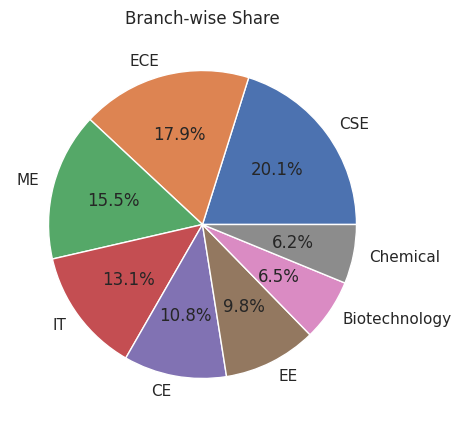

In [12]:
# at the data for branch share
plt.figure(figsize=(5,5))
df['Branch'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Branch-wise Share")
plt.ylabel("")
plt.show()


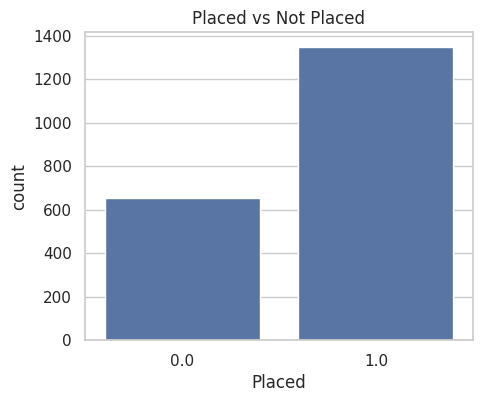

In [13]:
# placements
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Placed')
plt.title("Placed vs Not Placed")
plt.show()



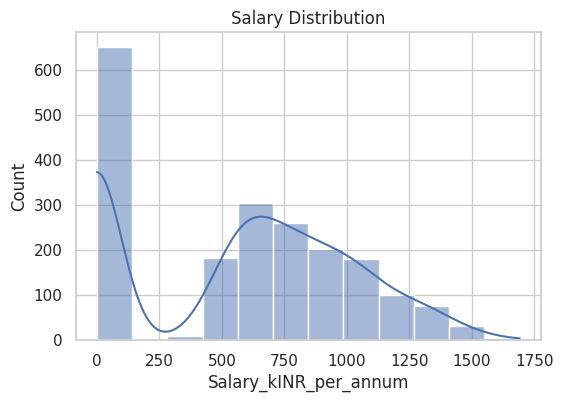

In [14]:
# salary distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Salary_kINR_per_annum'], kde=True)
plt.title("Salary Distribution")
plt.show()



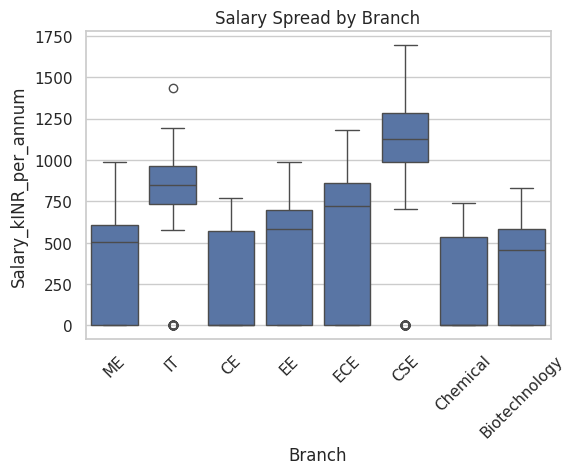

In [15]:
# salary by branch
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Branch', y='Salary_kINR_per_annum')
plt.title("Salary Spread by Branch")
plt.xticks(rotation=45)
plt.show()



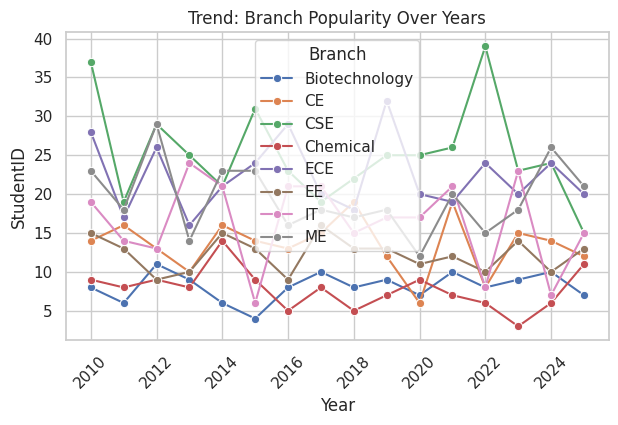

In [16]:
#Year-wise Branch Trend
plt.figure(figsize=(7,4))
trend = df.groupby(['Year','Branch'])['StudentID'].count().reset_index()
sns.lineplot(data=trend, x='Year', y='StudentID', hue='Branch', marker='o')
plt.title("Trend: Branch Popularity Over Years")
plt.xticks(rotation=45)
plt.show()

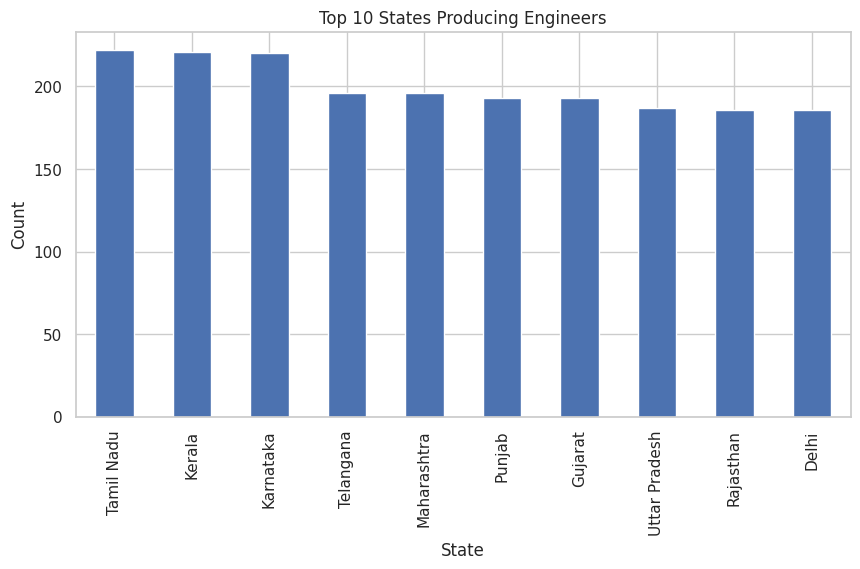

In [17]:
# 13 Top 10 states producing engineers
data=df.copy()
top_states = data['State'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_states.plot(kind='bar')
plt.title('Top 10 States Producing Engineers')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2842784188.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="StartupFounder", palette="mako")


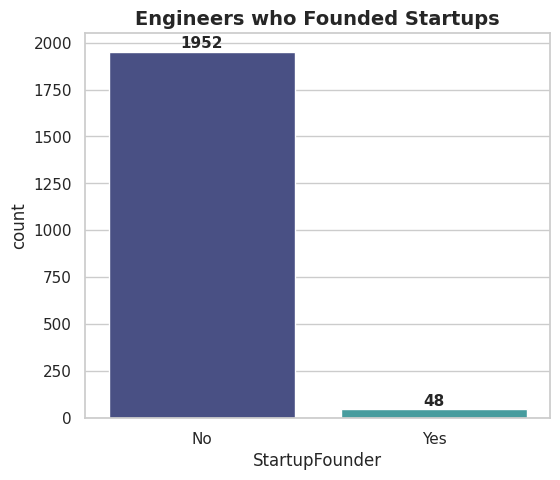

In [19]:
plt.figure(figsize=(6,5))
sns.set_style("whitegrid")
ax = sns.countplot(data=df, x="StartupFounder", palette="mako")
plt.title("Engineers who Founded Startups", fontsize=14, fontweight='bold')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 20,
            int(p.get_height()), ha='center', fontsize=11, fontweight='bold')

plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


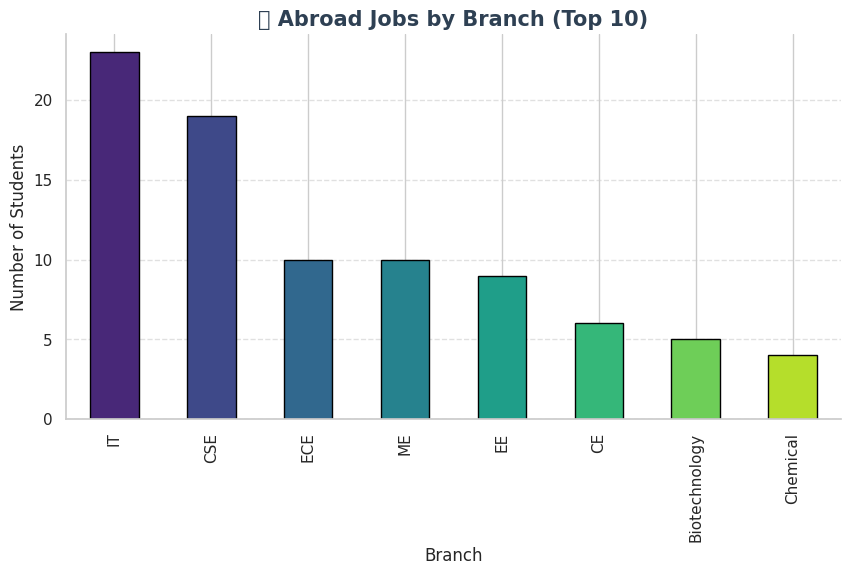

In [24]:
import seaborn as sns
plt.figure(figsize=(10,5))
colors = sns.color_palette("viridis", len(abroad_by_branch))  # or "mako", "rocket", "crest"
abroad_by_branch.plot(kind='bar', color=colors, edgecolor='black')

plt.title('🌍 Abroad Jobs by Branch (Top 10)', fontsize=15, fontweight='bold', color='#2E4053')
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

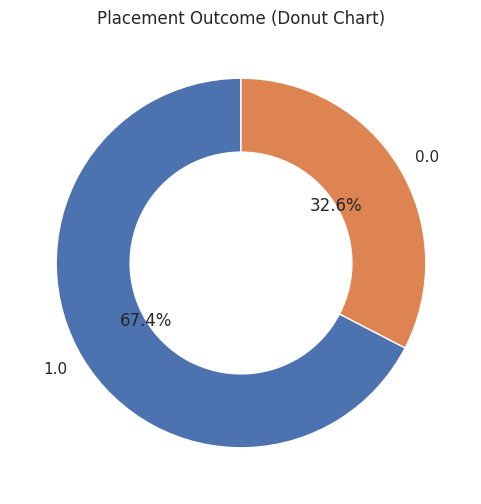

In [26]:
 #Donut chart for placement outcome
counts = data['Placed'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Placement Outcome (Donut Chart)')
plt.show()

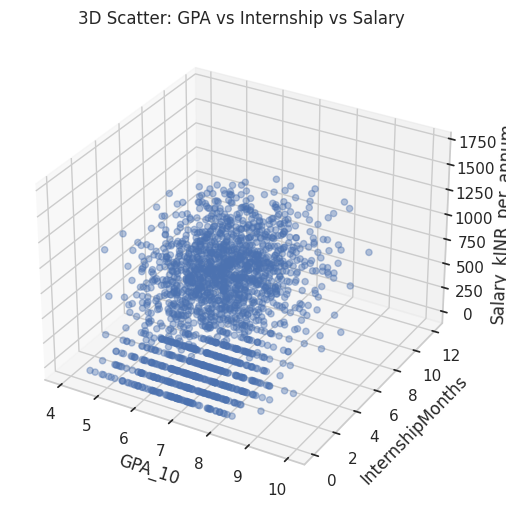

In [28]:
#3D scatter: GPA, InternshipMonths, Salary
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['GPA_10'], data['InternshipMonths'], data['Salary_kINR_per_annum'], alpha=0.4)
ax.set_xlabel('GPA_10')
ax.set_ylabel('InternshipMonths')
ax.set_zlabel('Salary_kINR_per_annum')
plt.title('3D Scatter: GPA vs Internship vs Salary')
plt.show()

In [31]:
# load data set
startup=pd.read_csv("/content/drive/MyDrive/startup_funding2018.csv")
# display first row
startup.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [32]:
# 1. Remove Duplicate Rows here all duplicates will be removed
startup.drop_duplicates(inplace=True)

# 3. Fill Remaining Missing Values
startup.fillna(method='ffill', inplace=True)   # forward-fill
startup.fillna(method='bfill', inplace=True)   # backward-fill

# 4. Reset Index after cleaning
startup.reset_index(drop=True, inplace=True)

# 5. Check result
startup.info()
startup.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   525 non-null    object
 1   Industry       525 non-null    object
 2   Round/Series   525 non-null    object
 3   Amount         525 non-null    object
 4   Location       525 non-null    object
 5   About Company  525 non-null    object
dtypes: object(6)
memory usage: 24.7+ KB


/tmp/ipython-input-4174643781.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  startup.fillna(method='ffill', inplace=True)   # forward-fill
/tmp/ipython-input-4174643781.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  startup.fillna(method='bfill', inplace=True)   # backward-fill


,0
Company Name,0
Industry,0
Round/Series,0
Amount,0
Location,0
About Company,0
